<a href="https://colab.research.google.com/github/DeviSatwika/21K61A1434/blob/main/Malaria_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [ ]:
base_dir = '/content/drive/My Drive/dataset'  # Adjust the path as per your dataset location
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
infected_train_dir = os.path.join(train_dir, 'infected_train')
uninfected_train_dir = os.path.join(train_dir, 'uninfected_train')
infected_test_dir = os.path.join(test_dir, 'infected_test')
uninfected_test_dir = os.path.join(test_dir, 'uninfected_test')


In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=32,
                                                  class_mode='binary')

Found 2028 images belonging to 2 classes.
Found 336 images belonging to 2 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model_checkpoint = ModelCheckpoint('malaria_model.h5', save_best_only=True, monitor='val_loss')

In [ ]:
history = model.fit(train_generator,
                    epochs=20,
                    validation_data=test_generator,
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/20
64/64 [==============================] - 377s 6s/step - loss: 0.6586 - accuracy: 0.5897 - val_loss: 0.6892 - val_accuracy: 0.5774
Epoch 2/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


64/64 [==============================] - 131s 2s/step - loss: 0.5852 - accuracy: 0.6430 - val_loss: 0.8218 - val_accuracy: 0.3601
Epoch 3/20
64/64 [==============================] - 132s 2s/step - loss: 0.5662 - accuracy: 0.6667 - val_loss: 0.8043 - val_accuracy: 0.5774
Epoch 4/20
64/64 [==============================] - 131s 2s/step - loss: 0.5099 - accuracy: 0.7101 - val_loss: 0.9291 - val_accuracy: 0.4048
Epoch 5/20
64/64 [==============================] - 129s 2s/step - loss: 0.4845 - accuracy: 0.7495 - val_loss: 0.8689 - val_accuracy: 0.4196
Epoch 6/20
64/64 [==============================] - 137s 2s/step - loss: 0.4303 - accuracy: 0.7850 - val_loss: 0.5383 - val_accuracy: 0.7768
Epoch 7/20
64/64 [==============================] - 128s 2s/step - loss: 0.3035 - accuracy: 0.8866 - val_loss: 0.4280 - val_accuracy: 0.9196
Epoch 8/20
64/64 [==============================] - 132s 2s/step - loss: 0.2701 - accuracy: 0.9038 - val_loss: 0.3109 - val_accuracy: 0.9405
Epoch 9/20
64/64 [======

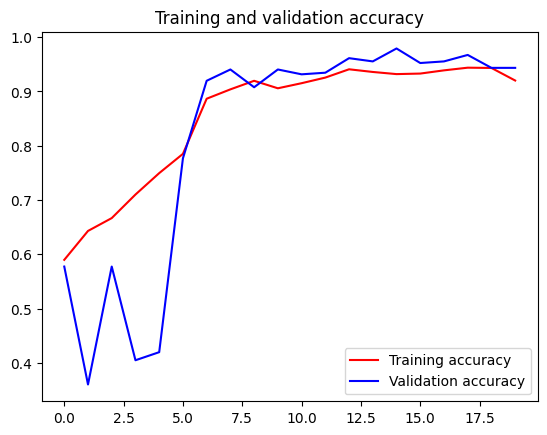

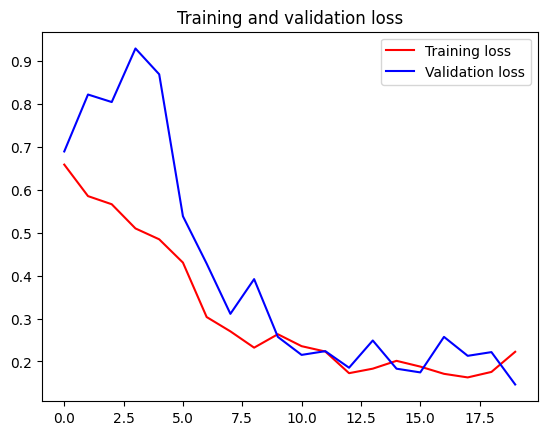

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()